In [1]:
import sys
print(sys.executable)

c:\Users\USER\AppData\Local\Programs\Python\Python312\python.exe


In [1]:
import pandas as pd
dataZ = pd.read_csv(r"C:\Users\USER\Downloads\student_admission_record_dirty.csv")
dataZ

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN
...,...,...,...,...,...,...,...
152,Ali,19.0,Female,85.0,78.09,Quetta,Accepted
153,Bilal,17.0,Female,81.0,84.40,Islamabad,Rejected
154,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
155,Shoaib,-1.0,Male,91.0,80.12,Quetta,Accepted


In [ ]:
print(dataZ.isnull().sum())

Name                      10
Age                       10
Gender                    10
Admission Test Score      11
High School Percentage    11
City                      10
Admission Status          10
dtype: int64


In [8]:
print(dataZ.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB
None


In [5]:
#return new Data Frame with no empty cells
newdataZ = dataZ.dropna()
print(newdataZ)

        Name   Age  Gender  Admission Test Score  High School Percentage  \
0    Shehroz  24.0  Female                  50.0                   68.90   
3      Aliya  17.0    Male                  55.0                   85.29   
7      Rabia  20.0  Female                  82.0                   55.67   
9     Kamran  18.0    Male                  53.0                   98.98   
10    Shafiq  17.0    Male                  78.0                  -10.00   
..       ...   ...     ...                   ...                     ...   
152      Ali  19.0  Female                  85.0                   78.09   
153    Bilal  17.0  Female                  81.0                   84.40   
154   Fatima  21.0  Female                  98.0                   50.86   
155   Shoaib  -1.0    Male                  91.0                   80.12   
156     Maaz  17.0    Male                  88.0                   86.85   

          City Admission Status  
0       Quetta         Rejected  
3      Karachi     

In [6]:
#identifying outliers using interquartile range
Q1 = newdataZ["High School Percentage"].quantile(0.25)
Q3 = newdataZ["High School Percentage"].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(23.375)

In [ ]:
#handling the outliers
upper_bound = Q1 - 1.5*IQR
lower_bound = Q3 + 1.5*IQR
newdataZ_= newdataZ[(newdataZ["High School Percentage"] >= lower_bound) & (newdataZ["High School Percentage"] <= upper_bound)]
newdataZ

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
7,Rabia,20.0,Female,82.0,55.67,Lahore,Accepted
9,Kamran,18.0,Male,53.0,98.98,Multan,Rejected
10,Shafiq,17.0,Male,78.0,-10.00,Quetta,Rejected
...,...,...,...,...,...,...,...
152,Ali,19.0,Female,85.0,78.09,Quetta,Accepted
153,Bilal,17.0,Female,81.0,84.40,Islamabad,Rejected
154,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
155,Shoaib,-1.0,Male,91.0,80.12,Quetta,Accepted


In [22]:
dataZ.describe()

,Age,Admission Test Score,High School Percentage
count,147.000000,146.000000,146.000000
mean,19.680272,77.657534,75.684726
std,4.540512,16.855343,17.368014
min,-1.000000,-5.000000,-10.000000
25%,18.000000,68.250000,65.052500
50%,20.000000,79.000000,77.545000
75%,22.000000,89.000000,88.312500
max,24.000000,150.000000,110.500000


<Axes: >

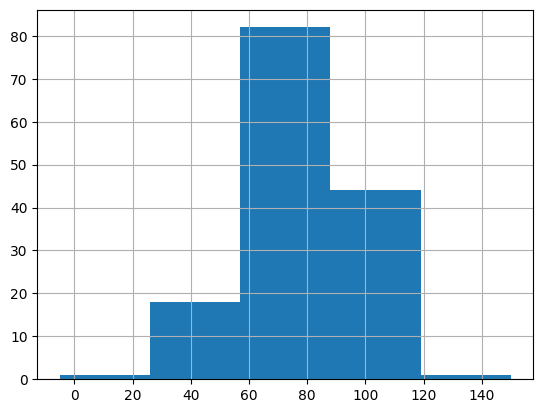

In [2]:
#Data Visualization
import matplotlib.pyplot as plt
dataZ["Admission Test Score"].hist(bins=5)


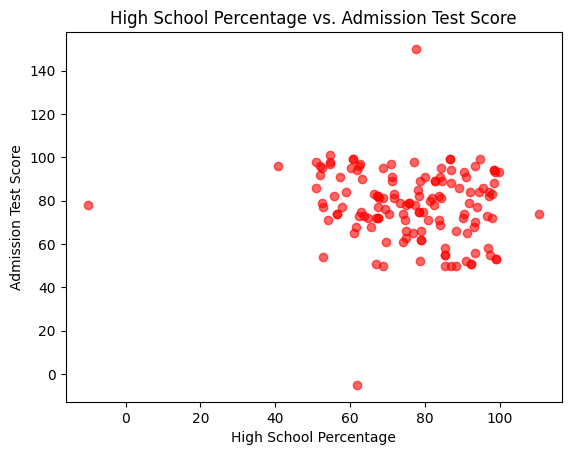

In [25]:
plt.scatter(dataZ["High School Percentage"], dataZ["Admission Test Score"], color="red", alpha=0.6)
plt.xlabel("High School Percentage")
plt.ylabel("Admission Test Score")
plt.title("High School Percentage vs. Admission Test Score")
plt.show()



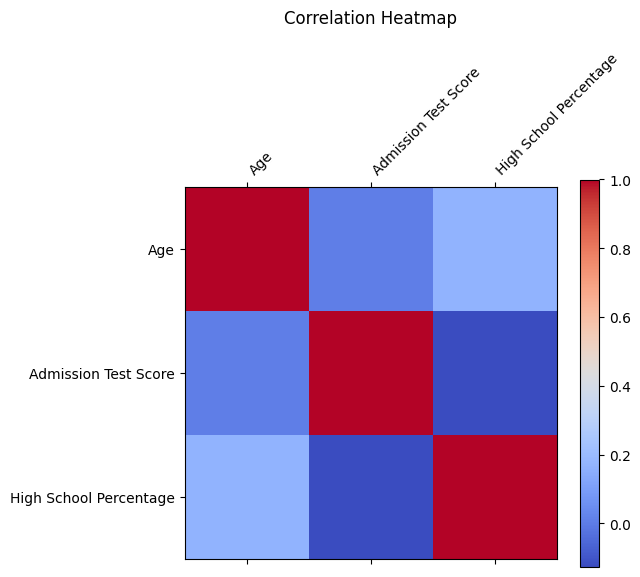

In [27]:
#correlation heatmap
import numpy as np
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = dataZ[["Age", "Admission Test Score", "High School Percentage"]].corr()

# Create heatmap using Matplotlib
plt.figure(figsize=(6, 5))
plt.matshow(corr_matrix, cmap="coolwarm", fignum=1)  # Use a color gradient
plt.colorbar()  # Add color scale

# Add labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha="left")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.index)

plt.title("Correlation Heatmap", pad=20)
plt.show()
